In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# cross validation function 

It is possible to use different cross-validators
https://www.kaggle.com/nanomathias/bayesian-optimization-of-xgboost-lb-0-9769/notebook

In [3]:
import numpy as np
import pandas as pd

def cross_valid_prob(clf, dtrain, y, kf, features, dtest=None, evaluation=None, cv_pred=True, drop=None):
    pred_train = np.zeros(dtrain.shape[0], dtype=np.float32)
    if type(dtest) == pd.core.frame.DataFrame:
        pred_test = np.zeros(dtest.shape[0], dtype=np.float32)
    scores = []
    

    iteration = 0 
    for train_index, val_index in kf.split(y):
        
        x_train, x_val = dtrain.iloc[train_index], dtrain.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]
        if type(drop) == np.ndarray:
            index = drop[train_index] == False
            print(sum(index))

        if type(drop) == np.ndarray:
            clf.fit(x_train.loc[index, features], y_train[index])
        else:
            clf.fit(x_train[features], y_train)
        
        if evaluation or cv_pred:
            pred = clf.predict_proba(x_val[features])
            pred_train[val_index] = pred[:,0]
            
            if evaluation:
                score = evaluation(y_val, pred)
                scores.append(score)
                print("Fold ", iteration, " Score ", score)

        if type(dtest) == pd.core.frame.DataFrame:
            pred = clf.predict_proba(test[features])
            pred_test += pred[:,0]
            
        iteration += 1

    print("Average Score ", np.mean(scores))
    if cv_pred and type(dtest) == pd.core.frame.DataFrame:
        return pred_train, pred_test/iteration
    elif cv_pred:
        return pred_train
    elif type(dtest) == pd.core.frame.DataFrame:
        return pred_test/iteration

In [3]:
import numpy as np
import pandas as pd

def cross_valid(clf, dtrain, y, kf, features, dtest=None, evaluation=None, cv_pred=True, drop=None):
    pred_train = np.zeros(dtrain.shape[0], dtype=np.float32)
    if type(dtest) == pd.core.frame.DataFrame:
        pred_test = np.zeros(dtest.shape[0], dtype=np.float32)
    scores = []
    

    iteration = 0 
    for train_index, val_index in kf.split(y):
        
        x_train, x_val = dtrain.iloc[train_index], dtrain.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]
        if type(drop) == np.ndarray:
            index = drop[train_index] == False
            print(sum(index))

        if type(drop) == np.ndarray:
            clf.fit(x_train.loc[index, features], y_train[index])
        else:
            clf.fit(x_train[features], y_train)
        
        if evaluation or cv_pred:
            pred = clf.predict(x_val[features])
            pred_train[val_index] = pred
            
            if evaluation:
                score = evaluation(y_val, pred)
                scores.append(score)
                print("Fold ", iteration, " Score ", score)

        if type(dtest) == pd.core.frame.DataFrame:
            pred = clf.predict(test[features])
            pred_test += pred
            
        iteration += 1

    print("Average Score ", np.mean(scores))
    if cv_pred and type(dtest) == pd.core.frame.DataFrame:
        return pred_train, pred_test/iteration
    elif cv_pred:
        return pred_train
    elif type(dtest) == pd.core.frame.DataFrame:
        return pred_test/iteration

# Test

In [4]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

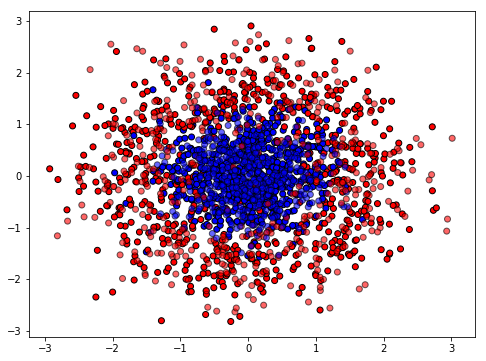

In [5]:
X, y = make_circles(n_samples=2000, shuffle=True, noise=.3, random_state=1, factor=0.2)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

X = StandardScaler().fit_transform(X)
X, X1, y, y1 = train_test_split(X, y, test_size=.4, random_state=42)

# just plot the dataset first
figure = plt.figure(figsize=(8, 6))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
# and testing points
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap=cm_bright, alpha=0.6, edgecolors='k')

In [6]:
import pandas as pd
train = pd.DataFrame(X, columns=["col1", "col2"])
test = pd.DataFrame(X1, columns=["col1", "col2"])

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 123)

In [8]:
from sklearn.model_selection import KFold
skf = KFold(n_splits = 5, shuffle = True, random_state = 123)

In [25]:
from sklearn.metrics import log_loss
ptrain, ptest = cross_valid(clf, train, y, features=["col1", "col2"], kf=skf, dtest=test, evaluation=log_loss)

Fold  0  Score  1.80378345663
Fold  1  Score  1.22472057386
Fold  2  Score  0.816183404678
Fold  3  Score  1.64339604618
Fold  4  Score  1.91808741997
Average Score  1.48123418026


In [26]:
train["drop"] = False
index = abs(ptrain - y) < 0.01
train.loc[index, "drop"] = True

In [27]:
sum(train["drop"])

44

In [20]:
train.head()

,col1,col2,drop
0,1.964667,0.067127,False
1,0.342212,-0.381416,False
2,0.738841,0.308850,False
3,-0.319632,0.712121,False
4,0.074582,-0.627791,False


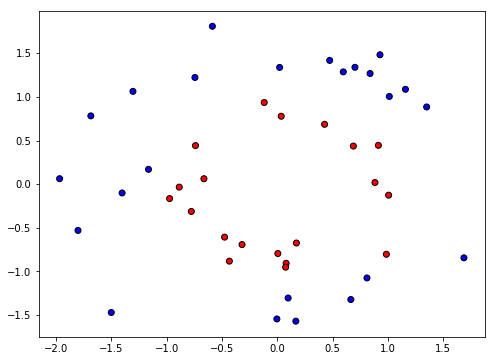

In [21]:
index = train["drop"].values
# just plot the dataset first
figure = plt.figure(figsize=(8, 6))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

# Plot the training points
plt.scatter(train.loc[index,"col1"], train.loc[index,"col2"], c=y[index], cmap=cm_bright, edgecolors='k')
# and testing points
#plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap=cm_bright, alpha=0.6, edgecolors='k')

In [22]:
ptrain, ptest = cross_valid(clf, train, y, features=["col1", "col2"], kf=skf, dtest=test, 
                            evaluation=log_loss, drop=train["drop"].values)

927
Fold  0  Score  1.78271402251
923
Fold  1  Score  1.33375415906
920
Fold  2  Score  1.14298578207
926
Fold  3  Score  1.4782378105
928
Fold  4  Score  1.88551348338
Average Score  1.5246410515


In [46]:
train["drop"] = False
index = abs(ptrain - y) < 0.5
train.loc[index, "drop"] = True

In [47]:
sum(train["drop"])

125